<a href="https://colab.research.google.com/github/withjungjh/My-Neuromatch-Academy/blob/main/ANOVA%26t_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# 평균의 비교와 통계

자신이 실험을 설계하고 실험 데이터를 얻었다고 상상해보자. 특정 뇌의 영역을 optogenically 두 집단 혹은 그 이상의 집단이 서로 질적인 차이를 보인다는 것을 누구라도 동의할 만한 기준으로 보인다는 것은 쉽지 않은 일이다. 그 이유는 각 집단이 homogenous하지 않고 heterogenous하기 때문이다. 다음 예시를 보자. 


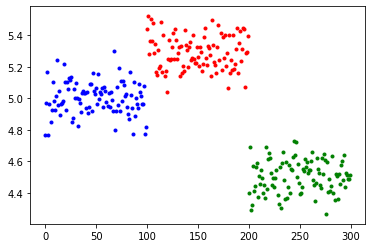

In [ ]:
centers = [5,5.3,4.5]
std = 0.1
colors = 'brg'

data_1 = []
for i in range(3):
    data_1.append(stats.norm(centers[i], std).rvs(100))
    plt.plot(np.arange(len(data_1[i]))+i*len(data_1[0]),data_1[i], '.', color = colors[i])

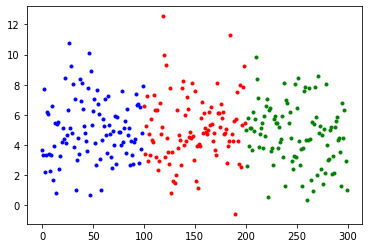

In [ ]:
std_2 = 2
data_2 = []
for i in range(3):
    data_2.append(stats.norm(centers[i], std_2).rvs(100))
    plt.plot(np.arange(len(data_1[i]))+i*len(data_2[0]), data_2[i], '.', color = colors[i])

위의 그림은 표준편차 std_1 = 0.1 이고, 파란색 빨간색, 초록색 집단이 확실히 평균에서 차이가 발생하는 집단이라는 것을 알 수 있다. 그런데 아래 그림에서는 평균이 같음(`centers = [5,5.3,4.5]`)에도 불구하고 집단 간에 차이가 있다고 말하기 어렵다. 

이러한 문제를 해결하기 위해서 통계에서는 경우에 따라서 t-test와 ANOVA라는 통계 기법을 이용해 두 집단의 평균이 다른지 검정(test)한다. 이 두 단어는 아마 논문을 읽으면서 괄호 안에 들어가 있는 것을 많이 봤으리라 생각되고 따라서 평소에 이 개념들에 대해서 잘 알지 못하고 넘어 갔던 사람들에게 도움이 되고자 이 두 개념에 대해서 간단하게 설명하고 코드를 통해서 어떻게 분석을 할 수 있는지 설명하고 실제 뇌과학 연구에서 어떤 방식으로 쓰일 수 있을 지에 대해서도 이야기하고자 한다. 

# t-test
두 집단 사이의 평균이 차이가 있는지 검정하기 위해서 사용하는 방식이 t-test이다. 

## standardization
t-test에 대해서 설명하기에 앞서서 알아야 할 개념으로 standardization(표준화)이 있다. standardization은 확률변수 X, Y가 있다고 할 때 각 변수마다 단위도 다르고 퍼져있는 분산도 다르기 때문에 두 집단을 비교하기 위해서는 일종의 키 맞추기를 해주어야 할 때 사용하는 방식이다. 표준화는 다음 식으로 한다. 

$$ z = \frac{x-\mu}{\sigma}$$

## t-test






두 집단 사이의 평균에 차이가 있는지 확인하기 위해서 사용하는 방법으로 다음과 같이 수식을 통해 표현할 수 있다.

$$ t = \frac{\bar{X}_1 - \bar{X}_2}{s_{\bar{X}_1 - \bar{X}_2}} $$

두 집단 사이의 평균을 불확실성으로 나눠준다고 생각하면 이 식을 이해하기 쉬울 것이다. 이 방식은 잉반적으로 모집단의 분산을 모를 때에 사용한다. 






In [ ]:
dat_M = [117, 108, 105, 89, 101, 93, 96, 108, 108, 94, 93, 112, 92, 91, 100, 96, 120, 86, 96, 95]
dat_F = [121, 101, 102, 114, 103, 105, 101, 131, 96, 109, 109, 113, 115, 94, 108, 96, 110, 112, 120, 100]

print("mean of dat_M:", np.mean(dat_M))
print("mean of dat_F:", np.mean(dat_F))

mean of dat_M: 100.0
mean of dat_F: 108.0


두 집단의 평균 차이가 통계적으로 유의미한지 t-test

In [ ]:
stats.ttest_ind(dat_M, dat_F, equal_var=False)


Ttest_indResult(statistic=-2.670573872669349, pvalue=0.01108318824471652)

p < -0.05이므로 통계적으로 유의하다.

__equal_var: bool, optional__

If True (default), perform a standard independent 2 sample test that assumes equal population variances [1]. If False, perform Welch’s t-test, which does not assume equal population variance [2].

# ANOVA (Analysis of Variance, 분산분석)
여러 그룹 간에서 평균의 차이가 있는 그룹이 있는지를 판단하기 위해 사용하는 test로 다음 세 가지 조건을 만족할 때 사용해야 한다. 
- 정규성: 각각의 그룹의 변수는 정규분포를 따른다. 
- 분산의 동질성 : Y의 모집단 분산은 각각의 모집단에서 동일.
- 관찰의 독립성: 각각의 모집단에서 크기가 각각인 표본들이 독립적으로 표집. 

Group I: 50% 아산화 질소(nitrous oxide)와 50%의 산소(oxygen) 혼합물을 24시간 동안 흡입한 환자
Group II: 50% 아산화 질소와 50% 산소 혼합물을 수술 받는 동안만 흡입한 환자
Group III: 아산화 질소 없이 오직 35-50%의 산소만 24시간동안 처리한 환자

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


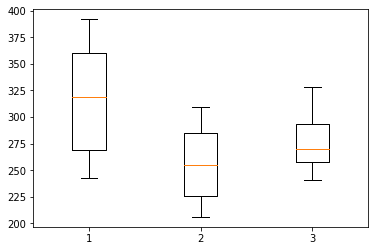

In [ ]:
# url로 데이터 얻어오기
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[:,1]==1,0]
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

# matplotlib plotting
plot_data = [group1, group2, group3]
ax = plt.boxplot(plot_data)
plt.show()

## Scipy.stats으로 One-way ANOVA

In [ ]:
F_statistic, pVal = stats.f_oneway(group1, group2, group3)
print('Altman 910 데이터의 일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.')

Altman 910 데이터의 일원분산분석 결과 : F=3.7, p=0.04359
P-value 값이 충분히 작음으로 인해 그룹의 평균값이 통계적으로 유의미하게 차이납니다.


## Statsmodel을 사용한  one-way ANOVA

In [ ]:
import warnings
warnings.filterwarnings("ignore")
df = pd.DataFrame(data, columns=['value', 'treatment'])
model = ols('value ~ C(treatment)', df).fit()

print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN


## Two-way ANOVA
독립변인의 수가 두 개 이상일 때 집단 간 차이가 유의한지를 검증하는 데 사용한다. 상호작용 효과(interaction effect; 다른 변수에 의해서 한 변수가 결과에 미치는 영향이 달라지는 지)를 확인하기 위해 사용됨.

### 예제 데이터(altman_12_6) 설명
태아의 머리 둘레 측정 데이터입니다. 4명의 관측자가 3명의 태아를 대상으로 측정을 했습니다. 이를 통해서 초음파로 태아의 머리 둘레측정 데이터가 재현성이 있는지를 조사하였습니다.

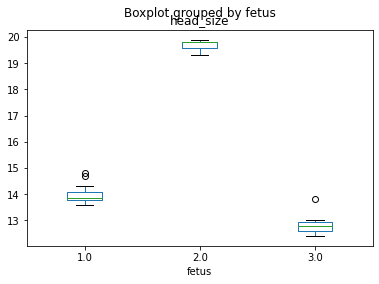

In [ ]:
inFile = 'altman_12_6.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Bring them in dataframe-format
df = pd.DataFrame(data, columns=['head_size', 'fetus', 'observer'])
# df.tail()

# 태아별 머리 둘레 plot 만들기
df.boxplot(column = 'head_size', by='fetus' , grid = False)

In [ ]:
formula = 'head_size ~ C(fetus) + C(observer) + C(fetus):C(observer)' 
lm = ols(formula, df).fit() 
print(anova_lm(lm))

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN


In [ ]:
anova = anova_lm(lm)
p = anova[anova["PR(>F)"]>0.05]
print(p)

                       df    sum_sq   mean_sq         F    PR(>F)
C(fetus):C(observer)  6.0  0.562222  0.093704  1.222222  0.329551


분산분석(ANOVA)는 전체 그룹간의 평균값 차이가 통계적 의미가 있는지 판단하는데 유용한 도구 입니다. 하지만 정확히 어느 그룹의 평균값이 의미가 있는지는 알려주지 않습니다. 따라서 추가적인 사후분석(Post Hoc Analysis) 이 필요합니다. 사후분석에 대해서는 다음 기회에 알아 보도록 하겠습니다.

# Reference
- https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one
- https://blog.naver.com/istech7/50151098832
- https://partrita.github.io/posts/ANOVA-python/
- https://mindscale.kr/course/basic-stat-python/16/
- https://www.real-statistics.com/students-t-distribution/two-sample-t-test-uequal-variances/
- https://www.investopedia.com/terms/d/degrees-of-freedom.asp
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/anova/